In [1]:
from keras.preprocessing.image import img_to_array
from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras_preprocessing.image import load_img

import numpy as np

from IPython.display import Image

Using TensorFlow backend.


In [2]:
base = InceptionV3(include_top=True, weights='imagenet',)

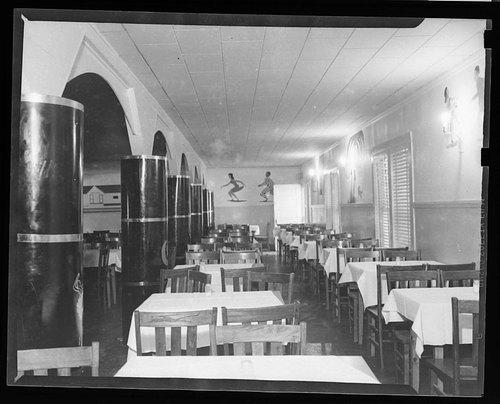

In [3]:
test_image_path = 'data/images/NMAAHC-HCA_21_03_B.jpg'
Image(test_image_path)

In [4]:
test_image = load_img(test_image_path)

In [5]:
im = preprocess_input(img_to_array(test_image.resize((299,299))))

In [6]:
preds = base.predict(np.expand_dims(im, 0))

In [7]:
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n04081281', 'restaurant', 0.89386433), ('n02791270', 'barbershop', 0.018981984), ('n03028079', 'church', 0.00587189)]


In [8]:
import pandas as pd

In [9]:
prediction_df = pd.DataFrame(decode_predictions(preds, top=3)[0],
                             columns=['wordnet_id','label','confidence'])
prediction_df.head()

,wordnet_id,label,confidence
0,n04081281,restaurant,0.893864
1,n02791270,barbershop,0.018982
2,n03028079,church,0.005872


In [13]:
prediction = {}
for idx, pred in enumerate(decode_predictions(preds, top=3)[0]:
    wordnet_id, label, confidence = pred
    prediction['label_'+idx] = label
    prediction['conf_'+idx] = confidence
prediction

ValueError: too many values to unpack (expected 2)